<a href="https://colab.research.google.com/github/tanvee1302/Flight-Price-Prediction/blob/main/flight_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_excel('/content/Data_Train.xlsx')

In [3]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
df.Airline.unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [5]:
df.Route.unique()

array(['BLR → DEL', 'CCU → IXR → BBI → BLR', 'DEL → LKO → BOM → COK',
       'CCU → NAG → BLR', 'BLR → NAG → DEL', 'CCU → BLR',
       'BLR → BOM → DEL', 'DEL → BOM → COK', 'DEL → BLR → COK',
       'MAA → CCU', 'CCU → BOM → BLR', 'DEL → AMD → BOM → COK',
       'DEL → PNQ → COK', 'DEL → CCU → BOM → COK', 'BLR → COK → DEL',
       'DEL → IDR → BOM → COK', 'DEL → LKO → COK',
       'CCU → GAU → DEL → BLR', 'DEL → NAG → BOM → COK',
       'CCU → MAA → BLR', 'DEL → HYD → COK', 'CCU → HYD → BLR',
       'DEL → COK', 'CCU → DEL → BLR', 'BLR → BOM → AMD → DEL',
       'BOM → DEL → HYD', 'DEL → MAA → COK', 'BOM → HYD',
       'DEL → BHO → BOM → COK', 'DEL → JAI → BOM → COK',
       'DEL → ATQ → BOM → COK', 'DEL → JDH → BOM → COK',
       'CCU → BBI → BOM → BLR', 'BLR → MAA → DEL',
       'DEL → GOI → BOM → COK', 'DEL → BDQ → BOM → COK',
       'CCU → JAI → BOM → BLR', 'CCU → BBI → BLR', 'BLR → HYD → DEL',
       'DEL → TRV → COK', 'CCU → IXR → DEL → BLR',
       'DEL → IXU → BOM → COK', 'CCU 

In [6]:
df.Route.isnull().sum()

np.int64(1)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [8]:
edges = []

for route in df['Route']:
    if isinstance(route, str) and '→' in route:
        stops = [code.strip() for code in route.split('→')]
        for i in range(len(stops) - 1):
            edges.append((stops[i], stops[i+1]))



In [9]:
import pandas as pd
import networkx as nx

# Step 1: Create graph from edges
G = nx.DiGraph()  # Directed graph since flight routes are directional
G.add_edges_from(edges)

# Step 2: Compute betweenness centrality
centrality = nx.betweenness_centrality(G)

# Step 3: Convert to DataFrame
centrality_df = pd.DataFrame(centrality.items(), columns=['Airport', 'Betweenness_Centrality'])

# Optional: Sort by most central airports
centrality_df = centrality_df.sort_values(by='Betweenness_Centrality', ascending=False)

# Step 4: Save to Excel
centrality_df.to_excel('centrality_airports.xlsx', index=False)

print("Centrality calculated and saved to 'centrality_airports.xlsx'")


Centrality calculated and saved to 'centrality_airports.xlsx'


In [10]:
df.Additional_Info.unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [12]:
# prompt: i want to convert duration which is in hh mm format to minutes

def convert_duration_to_minutes(duration):
  """Converts a duration string in 'hh mm' format to total minutes.

  Args:
    duration: A string representing the duration in 'hh mm' format.

  Returns:
    The total duration in minutes as an integer, or NaN if the format is invalid.
  """
  if isinstance(duration, str):
    parts = duration.split()
    total_minutes = 0
    try:
      if 'h' in parts[0]:
          total_minutes += int(parts[0].replace('h', '')) * 60
          if len(parts) > 1 and 'm' in parts[1]:
              total_minutes += int(parts[1].replace('m', ''))
      elif 'm' in parts[0]:
           total_minutes += int(parts[0].replace('m', ''))
      else:
          return np.nan # Invalid format
    except ValueError:
        return np.nan # Handle cases where conversion to int fails
    return total_minutes
  return np.nan # Not a string

# Apply the function to the 'Duration' column
df['Duration_minutes'] = df['Duration'].apply(convert_duration_to_minutes)

df.head()


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Duration_minutes
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,170
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,445
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,1140
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,325
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,285


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Airline           10683 non-null  object
 1   Date_of_Journey   10683 non-null  object
 2   Source            10683 non-null  object
 3   Destination       10683 non-null  object
 4   Route             10682 non-null  object
 5   Dep_Time          10683 non-null  object
 6   Arrival_Time      10683 non-null  object
 7   Duration          10683 non-null  object
 8   Total_Stops       10682 non-null  object
 9   Additional_Info   10683 non-null  object
 10  Price             10683 non-null  int64 
 11  Duration_minutes  10683 non-null  int64 
dtypes: int64(2), object(10)
memory usage: 1001.7+ KB


In [14]:
pip install catboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 7.5 MB/s eta 0:00:00


In [15]:
df['Journey_day']=pd.to_datetime(df['Date_of_Journey']).dt.day
df['Journey_month']=pd.to_datetime(df['Date_of_Journey']).dt.month
df['Dep_hour']=pd.to_datetime(df['Dep_Time']).dt.hour
df['Dep_min']=pd.to_datetime(df['Dep_Time']).dt.minute

/tmp/ipython-input-15-3095136292.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Journey_day']=pd.to_datetime(df['Date_of_Journey']).dt.day
/tmp/ipython-input-15-3095136292.py:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Journey_month']=pd.to_datetime(df['Date_of_Journey']).dt.month
/tmp/ipython-input-15-3095136292.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Dep_hour']=pd.to_datetime(df['Dep_Time']).dt.hour
/tmp/ipython-input-15-3095136292.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as

In [16]:
df['Arrival_hour'] = pd.to_datetime(df['Arrival_Time']).dt.hour
df['Arrival_minute'] = pd.to_datetime(df['Arrival_Time']).dt.minute

/tmp/ipython-input-16-2856706778.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Arrival_hour'] = pd.to_datetime(df['Arrival_Time']).dt.hour
/tmp/ipython-input-16-2856706778.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Arrival_minute'] = pd.to_datetime(df['Arrival_Time']).dt.minute


In [17]:
df.drop(['Date_of_Journey', 'Dep_Time', 'Arrival_Time', 'Route', 'Duration'], axis=1, inplace=True)

# Drop rows with missing values in 'Total_Stops'
df.dropna(subset=['Total_Stops'], inplace=True)

# Define categorical features for CatBoost
cat_features = ['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info']

# Define features and target
X = df.drop('Price', axis=1)
y = df['Price']

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [20]:
# Fill missing values in all categorical features with a string
for col in cat_features:
    X[col] = X[col].fillna('Missing')


In [21]:
# Define categorical features
cat_features = ['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info']

# Fill NaNs in categorical columns with 'Missing'
for col in cat_features:
    df[col] = df[col].fillna('Missing')

# Drop or fill numerical NaNs (if any)
df.fillna(method='ffill', inplace=True)

# Continue with feature extraction as before...


/tmp/ipython-input-21-2568525088.py:9: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


In [22]:
X = df.drop('Price', axis=1)
y = df['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the CatBoost model as before


In [24]:
from catboost import CatBoostRegressor

model = CatBoostRegressor(
    iterations=1000,
    learning_rate=0.1,
    depth=6,
    eval_metric='MAE',
    random_seed=42,
    verbose=100
)

model.fit(X_train, y_train, cat_features=cat_features, eval_set=(X_test, y_test))


0:	learn: 3411.8546338	test: 3434.0127658	best: 3434.0127658 (0)	total: 119ms	remaining: 1m 58s
100:	learn: 1113.9473941	test: 1148.3774531	best: 1148.3774531 (100)	total: 2.83s	remaining: 25.1s
200:	learn: 957.3008602	test: 1020.2012650	best: 1020.2012650 (200)	total: 5.11s	remaining: 20.3s
300:	learn: 863.7598535	test: 950.7406975	best: 950.5275318 (299)	total: 8.08s	remaining: 18.8s
400:	learn: 803.1663867	test: 907.5702265	best: 907.5702265 (400)	total: 10.8s	remaining: 16.1s
500:	learn: 757.7198955	test: 877.7463392	best: 877.5335284 (499)	total: 13.9s	remaining: 13.9s
600:	learn: 720.1239613	test: 850.6175758	best: 850.5303537 (598)	total: 15s	remaining: 9.96s
700:	learn: 688.4250941	test: 832.0878357	best: 832.0126974 (696)	total: 16.2s	remaining: 6.89s
800:	learn: 658.9168477	test: 819.7827012	best: 819.5462587 (798)	total: 17.3s	remaining: 4.29s
900:	learn: 627.9102087	test: 799.3144981	best: 799.3144981 (900)	total: 18.4s	remaining: 2.02s
999:	learn: 607.9518608	test: 790.932

In [25]:
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: ₹{mae:.2f}')


Mean Absolute Error: ₹790.93


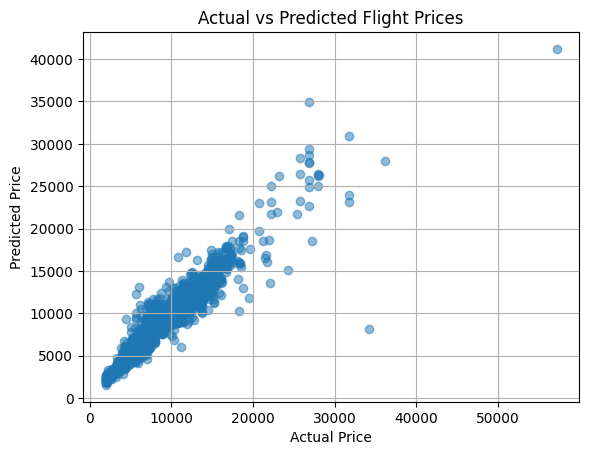

In [26]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Flight Prices")
plt.grid(True)
plt.show()


In [28]:
feature_importances = model.get_feature_importance(prettified=True)
print(feature_importances)


          Feature Id  Importances
0   Duration_minutes    24.835699
1            Airline    21.647875
2      Journey_month    14.549354
3        Journey_day    11.612421
4    Additional_Info     7.722833
5        Total_Stops     5.542917
6       Arrival_hour     3.619887
7            Dep_min     2.974107
8           Dep_hour     2.564106
9     Arrival_minute     1.748143
10       Destination     1.623913
11            Source     1.558745


In [27]:
df['Total_Stops'] = df['Total_Stops'].replace({'non-stop': 0, '1 stop': 1,
                                                '2 stops': 2, '3 stops': 3,
                                                '4 stops': 4})


/tmp/ipython-input-27-455768635.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Total_Stops'] = df['Total_Stops'].replace({'non-stop': 0, '1 stop': 1,


In [29]:
!pip install streamlit pyngrok



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 54.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 73.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.0 MB/s eta 0:00:00


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Airline           10682 non-null  object
 1   Source            10682 non-null  object
 2   Destination       10682 non-null  object
 3   Total_Stops       10682 non-null  int64 
 4   Additional_Info   10682 non-null  object
 5   Price             10682 non-null  int64 
 6   Duration_minutes  10682 non-null  int64 
 7   Journey_day       10682 non-null  int32 
 8   Journey_month     10682 non-null  int32 
 9   Dep_hour          10682 non-null  int32 
 10  Dep_min           10682 non-null  int32 
 11  Arrival_hour      10682 non-null  int32 
 12  Arrival_minute    10682 non-null  int32 
dtypes: int32(6), int64(3), object(4)
memory usage: 918.0+ KB


In [32]:
df.Airline.unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [33]:
df.Source.unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [34]:
df.Destination.unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [35]:
df.Additional_Info.unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [44]:
%%writefile app.py
import streamlit as st
import pandas as pd
import pickle

# Load trained model
model = pickle.load(open('catboost_model.pkl', 'rb'))

st.set_page_config(page_title="Flight Fare Predictor", layout="centered")
st.title("✈️ Flight Fare Predictor")

st.markdown("Enter the flight details below to predict the price.")

# Airline input
airline = st.selectbox("Airline", [
    'IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
    'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
    'Vistara Premium economy', 'Jet Airways Business',
    'Multiple carriers Premium economy', 'Trujet'
])

# Source and Destination
source = st.selectbox("Source", ['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'])
destination = st.selectbox("Destination", ['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'])

# Total Stops
total_stops = st.selectbox("Total Stops", [0, 1, 2, 3, 4])

# Additional Info
additional_info = st.selectbox("Additional Info", [
    'No info', 'In-flight meal not included',
    'No check-in baggage included', '1 Short layover', 'No Info',
    '1 Long layover', 'Change airports', 'Business class',
    'Red-eye flight', '2 Long layover'
])

# Date selections
journey_day = st.slider("Journey Day", 1, 31)
month_map = {
    "January": 1, "February": 2, "March": 3, "April": 4,
    "May": 5, "June": 6, "July": 7, "August": 8,
    "September": 9, "October": 10, "November": 11, "December": 12
}
selected_month = st.selectbox("Journey Month", list(month_map.keys()))
journey_month = month_map[selected_month]

# Departure Time of Day (mapped to average hour)
time_of_day_map = {
    "Early Morning (4 AM - 8 AM)": 6,
    "Morning (8 AM - 12 PM)": 10,
    "Afternoon (12 PM - 4 PM)": 14,
    "Evening (4 PM - 8 PM)": 18,
    "Night (8 PM - 12 AM)": 22,
    "Late Night (12 AM - 4 AM)": 2
}
selected_time_period = st.selectbox("Departure Time of Day", list(time_of_day_map.keys()))
dep_hour = time_of_day_map[selected_time_period]

# Duration
duration_minutes = st.slider("Duration in Minutes", 0, 1500)

# Prepare input
input_df = pd.DataFrame({
    'Airline': [airline],
    'Source': [source],
    'Destination': [destination],
    'Total_Stops': [total_stops],
    'Additional_Info': [additional_info],
    'Duration_minutes': [duration_minutes],
    'Journey_day': [journey_day],
    'Journey_month': [journey_month],
    'Dep_hour': [dep_hour]
})

# Predict and display result
if st.button("Predict Price"):
    prediction = model.predict(input_df)[0]
    st.success(f"Estimated Flight Price: ₹{int(prediction):,}")


Overwriting app.py


In [37]:
import pickle

# Assuming your CatBoostRegressor is trained and stored in variable `model`
with open('catboost_model.pkl', 'wb') as f:
    pickle.dump(model, f)


In [42]:
# Run Streamlit
!streamlit run app.py &> /dev/null &

# Start ngrok tunnel
url = ngrok.connect(8501)
print(f"🔗 Your Streamlit app is live at: {url}")



🔗 Your Streamlit app is live at: NgrokTunnel: "https://c7e7-34-73-31-140.ngrok-free.app" -> "http://localhost:8501"


In [40]:
from pyngrok import ngrok

# Replace below with your actual authtoken
ngrok.set_auth_token("2yj1s5QMqOiBtqSfPFp9vczs1C2_3tg6ZXmttKgkBVAmSGPDG")


In [46]:
import streamlit as st

st.markdown(
    """
    <style>
    .stApp {
        background-color: #f5f5f5;
    }
    </style>
    """,
    unsafe_allow_html=True
)


2025-06-24 09:56:23.871 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-24 09:56:24.045 
  command:

    streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-06-24 09:56:24.047 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-24 09:56:24.048 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


DeltaGenerator()